# Arbre de décision

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
IMAGE_SIZE = 64

X = np.load("./data/X.npy")
X = X.reshape(len(X), 64*64) # mise a plat de l image

y_ = np.load("./data/Y.npy")

# Équivalence encodage/traduction
dic_equiv = {0:9, 1:0, 2:7, 3:6, 4:1, 5:8, 6:4, 7:3, 8:2 , 9:5} 

y = np.zeros(len(y_))
for k in range(len(y)):
    a = y_[k]
    y[k] = int(dic_equiv[np.where(a==1)[0][0]])
y = y.astype(int)

Le score du modèle est: 0.56


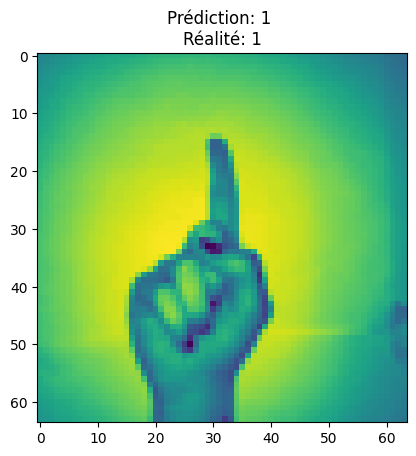

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=420)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

score = tree.score(X_test, y_test)

print(f"Le score du modèle est: {score:.2f}")

prediction = tree.predict([X_test[0]])
plt.imshow(X_test[0].reshape((IMAGE_SIZE, IMAGE_SIZE)))
plt.title(f"Prédiction: {prediction[0]} \nRéalité: {y_test[0]}")
plt.show()

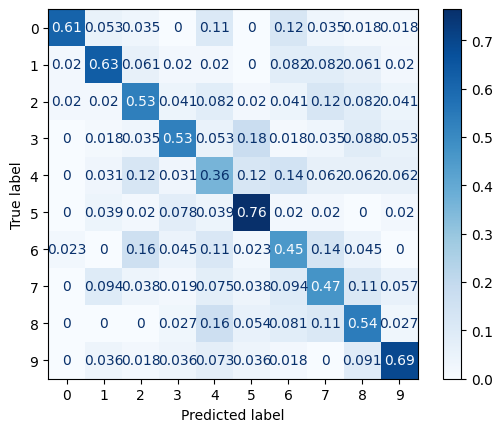

In [4]:
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, cmap=plt.cm.Blues, display_labels=range(0, 10), normalize="true")
plt.show()